In [ ]:
!pip install geopandas
!pip install pandas
!pip install matplotlib
!pip install shapely

In [ ]:
# link: https://bucas.maps.arcgis.com/apps/mapviewer/index.html?webmap=5c69e9e8085e49b5bf2af5ec9737276b

In [ ]:
# login to drive to link files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
import shutil

In [ ]:
# uploading neighborhood boundaries file downloaded from: https://www.cambridgema.gov/GIS/gisdatadictionary/Boundary/BOUNDARY_CDDNeighborhoods

shapefile = '/content/drive/MyDrive/ShotSpotter_colab/neighborhood_boundaries.shp'
gdf = gpd.read_file(shapefile)
gdf['NAME'] = gdf['NAME'].astype(str)
gdf

,N_HOOD,NAME,GlobalID,Webpage,Shape_area,Shape_len,geometry
0,4,The Port,{ED5E3360-A5DC-4A94-B1A2-56667062B754},https://www.cambridgema.gov/CDD/planud/neighpl...,8.346206e+06,11801.706662,"POLYGON ((764653.313 2960781.500, 764672.187 2..."
1,9,Neighborhood Nine,{5C8D020B-4883-4D21-AF50-2CC939451E04},https://www.cambridgema.gov/CDD/planud/neighpl...,1.776818e+07,20099.989638,"POLYGON ((756000.000 2967461.000, 756189.937 2..."
2,3,Wellington-Harrington,{62554B14-9B06-421D-BD6F-FBC78BD8D8A4},https://www.cambridgema.gov/CDD/planud/neighpl...,6.609875e+06,11769.746495,"POLYGON ((767632.109 2961320.843, 767626.776 2..."
3,6,Mid-Cambridge,{01C9B143-6C4E-474A-8AFE-3E0C59D25989},https://www.cambridgema.gov/CDD/planud/neighpl...,1.298083e+07,15198.295124,"POLYGON ((762280.952 2963049.666, 762280.965 2..."
4,11,North Cambridge,{93DD8D8A-FDFD-4971-A154-BACFE1FFF1DD},https://www.cambridgema.gov/CDD/planud/neighpl...,2.462609e+07,28460.158690,"POLYGON ((748977.057 2969466.998, 748980.746 2..."
5,12,Cambridge Highlands,{C0F9BF06-53F0-47EE-A291-82B172955DBF},https://www.cambridgema.gov/CDD/planud/neighpl...,1.477103e+07,17549.804363,"POLYGON ((748952.010 2969425.568, 748977.057 2..."
6,13,Strawberry Hill,{F27025EC-BE55-4B87-B4DE-ED5EF2A8AF3D},https://www.cambridgema.gov/CDD/planud/neighpl...,8.158538e+06,13954.951865,"POLYGON ((749038.853 2963922.009, 749038.504 2..."
7,10,West Cambridge,{1FD32AEC-D14C-4A32-9930-6143FE444EF1},https://www.cambridgema.gov/CDD/planud/neighpl...,3.429758e+07,33778.079745,"POLYGON ((753812.419 2958104.242, 753769.121 2..."
8,7,Riverside,{299A713A-BD58-46F8-9CF0-9AAF155E0294},https://www.cambridgema.gov/CDD/planud/neighpl...,9.575448e+06,15019.678412,"POLYGON ((757995.280 2959694.676, 758001.406 2..."
9,5,Cambridgeport,{2B966564-1135-4BE9-AE29-D94BBCCA61CD},https://www.cambridgema.gov/CDD/planud/neighpl...,1.580966e+07,16038.114882,"POLYGON ((759736.787 2956886.958, 759773.880 2..."


In [ ]:
# census by race data upload
csv = '/content/drive/MyDrive/ShotSpotter_colab/decennial_census_race.csv'
df = pd.read_csv(csv)
df

In [ ]:
# combining data with shapefile to upload to arcgis
merged = pd.merge(df, gdf, left_on='Neighborhood ', right_on='NAME')
merged.head()
merged.columns

Index(['Neighborhood ', 'Area', '1980 Population', '1980 White', '1980 Black',
       '1980 Asian & Pacific Islander', '1980 Other Race', '1980 Hispanic',
       '1990 Population', '1990 White', '1990 Black',
       '1990 Asian & Pacific Islander', '1990 Other Race', '1990 Hispanic',
       '1990 White Non-Hispanic', '2000 Population', '2000 White',
       '2000 Black', '2000 Asian & Pacific Islander', '2000 Other Race',
       '2000 Hispanic', '2000 White Non-Hispanic', '2010 Population',
       '2010 White', '2010 Black', '2010 Asian & Pacific Islander',
       '2010 Other Race', '2010 Hispanic', '2010 White Non-Hispanic',
       '2020 Popualtion', '2020 White', '2020 Black',
       '2020 Asian & Pacific Islander', '2020 Other Race', '2020 Hispanic',
       '2020 White Non-Hispanic', 'Centerpoint X', 'Centerpoint Y',
       'Neighborhood Center Point', 'N_HOOD', 'NAME', 'GlobalID', 'Webpage',
       'Shape_area', 'Shape_len', 'geometry'],
      dtype='object')

In [ ]:
# clean-up columns
# drop 1980-1990 data points and other stuff - probably should've been done like three steps ago
merged_clean = merged.drop(columns = ['1980 Population', '1980 White', '1980 Black',
                                      '1980 Asian & Pacific Islander', '1980 Other Race', '1980 Hispanic',
                                      '1990 Population', '1990 White', '1990 Black',
                                      '1990 Asian & Pacific Islander', '1990 Other Race',
                                      '1990 Hispanic', '1990 White Non-Hispanic', 'Centerpoint X',
                                      'Centerpoint Y', 'Neighborhood Center Point', 'N_HOOD', 'NAME',
                                      'GlobalID', 'Webpage'])
merged_clean.head()

,Neighborhood,Area,2000 Population,2000 White,2000 Black,2000 Asian & Pacific Islander,2000 Other Race,2000 Hispanic,2000 White Non-Hispanic,2010 Population,...,2020 Popualtion,2020 White,2020 Black,2020 Asian & Pacific Islander,2020 Other Race,2020 Hispanic,2020 White Non-Hispanic,Shape_area,Shape_len,geometry
0,East Cambridge,1,7294,5381,370,814,729,611,5077,9234,...,13246,7557,876,2933,1880,1495,7255,1.979585e+07,20067.077021,"POLYGON ((770091.947 2961544.170, 770105.309 2..."
1,Mid-Cambridge,6,13589,10540,702,1603,744,708,10098,12991,...,13974,8991,808,2436,1739,1148,8751,1.298083e+07,15198.295124,"POLYGON ((762280.952 2963049.666, 762280.965 2..."
2,North Cambridge,11,11237,6971,1982,1424,860,688,6737,11908,...,15372,8044,2492,3087,1749,1184,7820,2.462609e+07,28460.158690,"POLYGON ((748977.057 2969466.998, 748980.746 2..."
3,Area 2/MIT,2,5486,2712,339,2076,359,465,2451,5057,...,6238,2573,379,2514,772,804,2220,1.774211e+07,22041.386902,"POLYGON ((770201.467 2955762.817, 770201.389 2..."
4,Riverside,7,10897,6836,1539,1644,878,859,6356,12695,...,12114,6250,1271,2871,1722,1158,5981,9.575448e+06,15019.678412,"POLYGON ((757995.280 2959694.676, 758001.406 2..."


In [ ]:
# convert csv back to a shapefile

# set polygon geometry column as correct data type
geometry = [Polygon(coords) for coords in merged_clean['geometry']]
gdf_new = gpd.GeoDataFrame(merged_clean, geometry=geometry)

# exporting to a zip file (only way arcgis can read it)
shapefile_folder = '/content/drive/MyDrive/ShotSpotter_colab/gdf_new_decennial_census_race' # this directory has to be pre-made
shapefile_name = 'decennial_census_race'
shapefile_path = f'{shapefile_folder}/{shapefile_name}'

gdf_new.to_file(shapefile_path, driver='ESRI Shapefile')
shutil.make_archive(shapefile_path, 'zip', shapefile_folder)

gdf_assessment_items = gdf_assessment_items.to_crs(neighborhoods.crs)



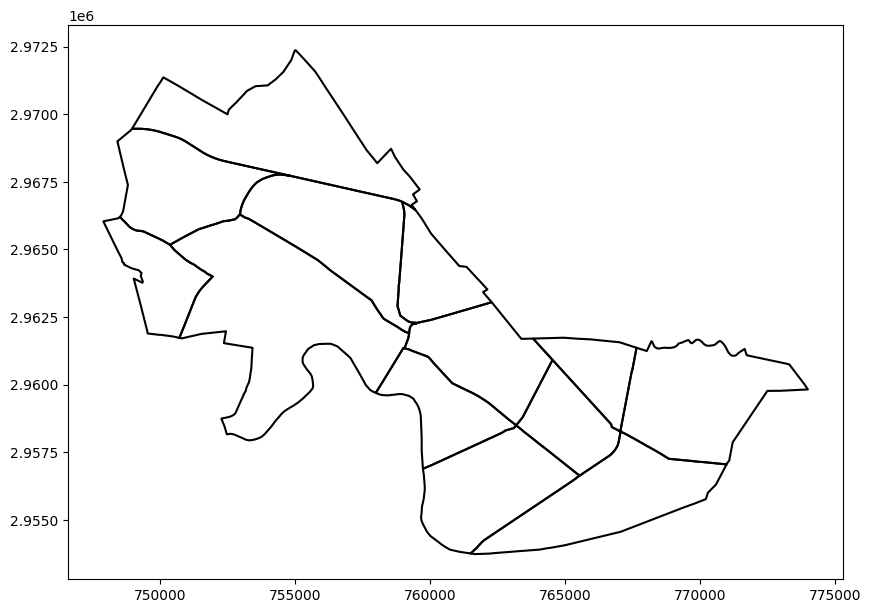

In [ ]:
# testing if shapefiles are real
fig, ax = plt.subplots(figsize=(10, 10))
gdf.boundary.plot(ax=ax, color='black')
plt.show()

Processing year 2014...
Processing year 2015...
Processing year 2016...
Processing year 2017...
Processing year 2018...
Processing year 2019...
Processing year 2020...
Processing year 2021...
Processing year 2022...
Processing year 2023...
